# DSCI 100: Individual Project Planning

## (1) Data Description

The Pacific Laboratory for Artificial Intelligence group at UBC, using a MineCraft server, collected data about how people play video games through automated tracking and user-reported information. Two datasets were provided: `sessions.csv` and `players.csv`. 

### `sessions.csv` Overview

The `sessions.csv` dataset provides information about each game session played, represented as a row. There are 1535 observations and this dataset has 5 variables, as follows:

| Variable | Data type | Meaning |
| :------- | :------- | :------- |
| hashedEmail | Character | Anonymized identifier for each player's email |
| start_time | Character | Date (DD/MM/Year) and time of the start of each session |
| end_time | Character | Date (DD/MM/Year) and time of the end of each session |
| original_start_time | Numeric | Original start time of game session (UNIX time, milliseconds)
| oritinal_end_time | Numeric | Original end time of game session (UNIX time, milliseconds)

There are potential problems in this dataset that may impede with analysis unless addressed:
- In `start_time` and `end_time` columns, each cell contains both the date and the time, which makes this data untidy. 
- Without wrangling the data, it is difficult to tell how many sessions have been played by each player.

### `players.csv` Overview

The `players.csv` dataset provides information about each player, represented as a row. The columns represent variables for each player. There are 196 observations and the dataset contains 7 variables:

| Variable | Data type | Meaning |
| :------- | :------- | :------- |
| experience | Character | Experience level of the player |
| subscribe | Logical | Whether the player subscribed to a game-related newsletter |
| hashedEmail | Character | Anonymized identifier for each player's email |
| played_hours | Numeric | Total time spent playing for each player in hours |
| name | Character | Player name |
| gender | Character | Player gender |
| Age | Numeric | Player age in years |

Potential problems in this dataset are:
- The values in the `subscribe` variable column are of the logical data type, and are not very descriptive of what the data means. They could be changed to factor type and renamed to descrribe the status of a player's subscription.
- There are missing (NA) values for some observations in the `Age` variable; these need to be dealt with prior to gathering summary statistics.

### Summary Statistics

For the `players.csv` dataset, the mean age of each player is 21.14 years, with a range of player ages from 9 (minimum) to 58 (maximum) years. The mean hours played per player is 5.90 hours, with a range of 0 (minimum) to 223.1 (maximum) hours. The code for thse calculations are listed in section (3) Exploratory Data Analysis and Visualization.

## (2) Questions

The goal of this analysis is to answer the question: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types? 

To address this broader question, this analysis will use the data in the `players.csv` dataset to answer a more specific question: Can age and the total hours played by a player predict whether they subscribe to a game-related newsletter?

The `players.csv` dataset contains the data necessary to answer this specific question, formatted already into a table such that the explanatory variables, `played_hours` (total number of hours played) and `Age` (age of player), are in their own columns and can be analyzed to see if they can predict the response variable, `subscribe` (whether or not the player subscribes to the game-related newsletter). Each player is one observation in this dataset, so we can easily compare these variables for each player and see if the explanatory variables are good predictors.

Since only the variables from the `players.csv` dataset are relevant to this question, only this dataset will be wrangled and used in the analysis and the `sessions.csv` dataset will not be used.

## (3) Exploratory Data Analysis and Visualization

In [1]:
#Loading libraries

library(tidyverse)
library(repr)
library(tidymodels)

options(repr.matrix.max.rows = 6)
# source('cleanup.R')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
#Reading in data from the sessions dataset

sessions_data <- read_csv("data/sessions.csv")
sessions_data

#Reading in data from the players dataset

players_data <- read_csv("data/players.csv")
players_data

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


### `players.csv` Dataset: Tidying and Summary Statistics

The following section of code 1) tidies the data so that it may be analyzed and 2) computes summary statistics (reported in section (1) Data Description).

In [3]:
#Tidying data: Removing rows with NA in order to analyze the data, and changing qualitative data to factor type
#FALSE and TRUE values were changed to Unsubscribed and Subscribed to make the data more understandable

players_data <- players_data |>
                filter(!is.na(Age), !is.na(played_hours), !is.na(subscribe)) |>
                mutate(experience = as.factor(experience),
                       subscribe = as.factor(subscribe),
                       subscribe = recode(subscribe, "FALSE" = "Unsubscribed", "TRUE" = "Subscribed"),
                       hashedEmail = as.factor(hashedEmail), 
                       gender = as.factor(gender))
players_data

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<fct>,<fct>,<dbl>,<chr>,<fct>,<dbl>
Pro,Subscribed,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,Subscribed,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,Unsubscribed,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Veteran,Unsubscribed,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22
Amateur,Unsubscribed,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,Unsubscribed,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17


In [4]:
#Computing summary statistics for the players.csv dataset
#As assignment parameters specified creating one table just for the mean, the table for minimum and maximums exist as a separate table

#Mean for each quantitative variable

mean_players_data <- players_data |>
    select(played_hours, Age) |>
    map_df(mean)
mean_players_data

#Min and max for each quantitative variable
max_min_players <- players_data |> 
    summarize(min_played_hours = min(played_hours),
              max_played_hours = max(played_hours),
              min_age = min(Age),
              max_age = max(Age))
max_min_players

played_hours,Age
<dbl>,<dbl>
5.904639,21.13918


min_played_hours,max_played_hours,min_age,max_age
<dbl>,<dbl>,<dbl>,<dbl>
0,223.1,9,58


### Exploratory Visualizations

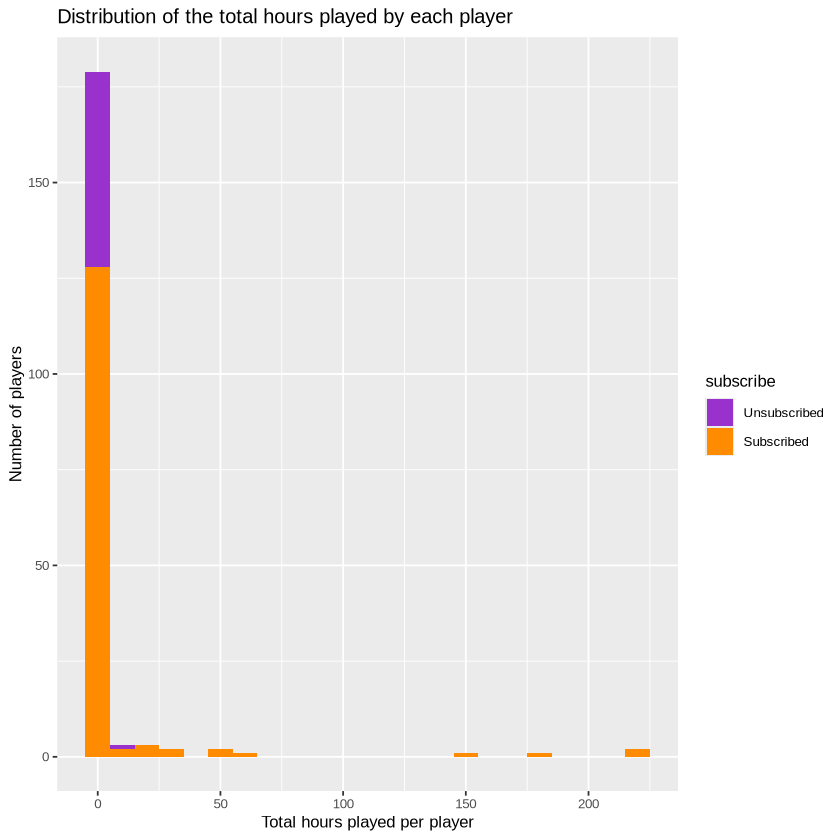

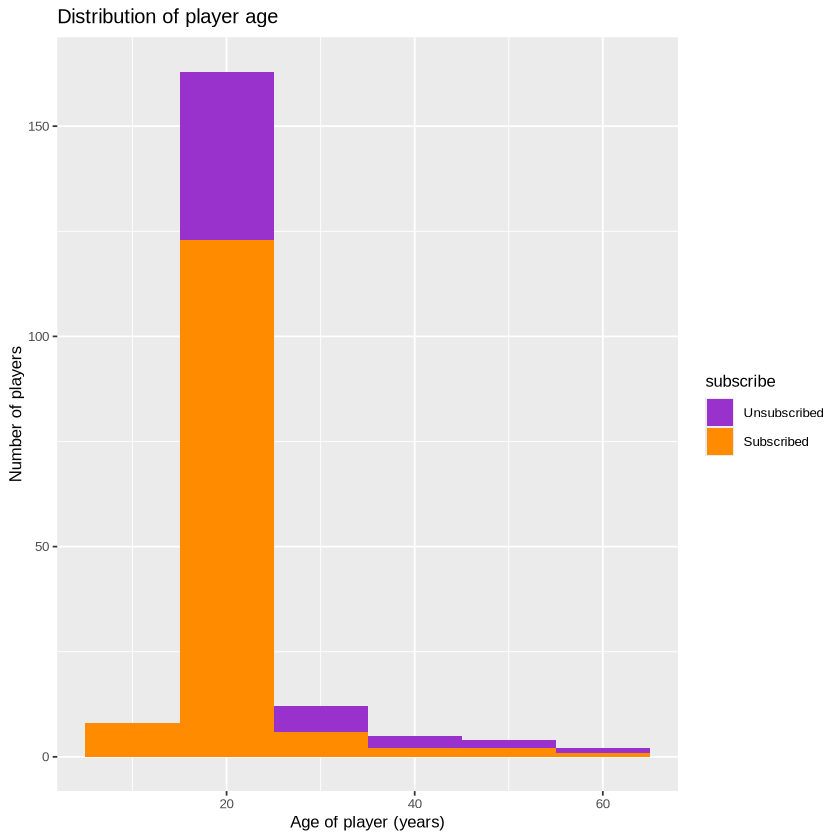

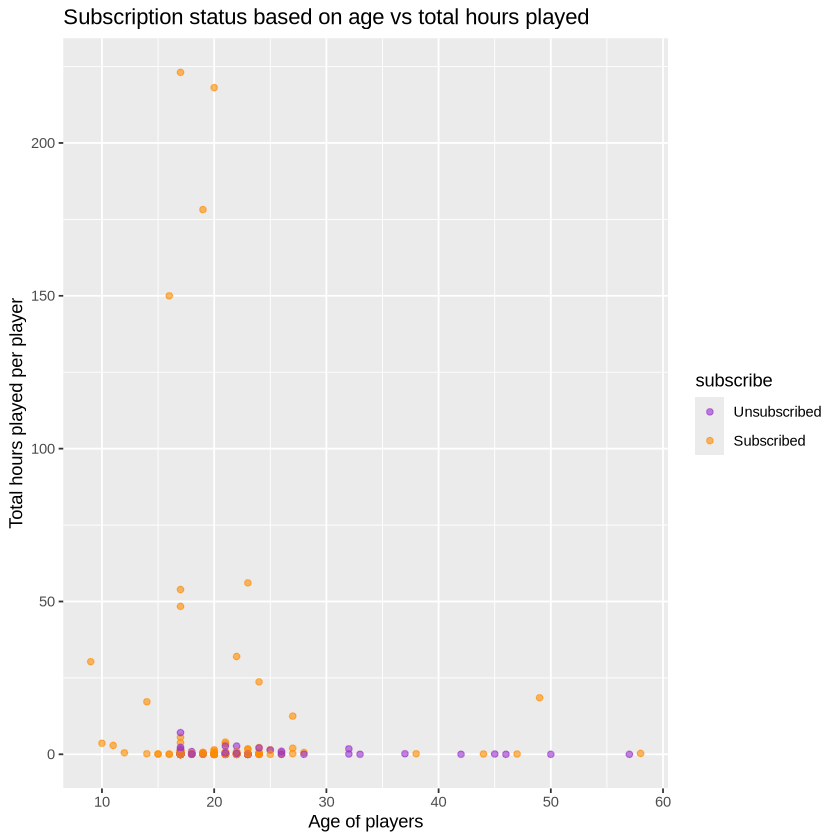

In [5]:
played_hours_histogram <- players_data |>
    ggplot(aes(x = played_hours, fill = subscribe)) +
    geom_histogram(binwidth = 10, position = "stack") +
    labs(x = "Total hours played per player",
         y = "Number of players",
         title = "Distribution of the total hours played by each player") +
    scale_fill_manual(values = c("Unsubscribed" = "darkorchid", "Subscribed" = "darkorange")) +
    theme(text = element_text(size = 10))
played_hours_histogram


age_histogram <- players_data |> 
    ggplot(aes(x = Age, fill = subscribe)) +
    geom_histogram(binwidth = 10, position = "stack") +
    labs(x = "Age of player (years)",
         y = "Number of players",
         title = "Distribution of player age") +
    scale_fill_manual(values = c("Unsubscribed" = "darkorchid", "Subscribed" = "darkorange")) +
    theme(text = element_text(size = 10))
age_histogram

age_vs_played_hours <- players_data |>
    ggplot(aes(x = Age, y = played_hours, color = subscribe)) +
    geom_point(alpha = 0.6) +
    labs(x = "Age of players",
         y = "Total hours played per player",
         title = "Subscription status based on age vs total hours played") +
    scale_color_manual(values = c("Unsubscribed" = "darkorchid", "Subscribed" = "darkorange")) 
age_vs_played_hours

### Insights from the Visualizations

The plot showing distribution of total hours played by each player shows that the majority of users played fewer than 50 hours. No unsubscribed players played more than 25 hours.

The plot showing distribution of age of players shows that the majority of players are around 20 years old.

Both histograms show that there are more observations where the players are subscribed than unsubscribed.

The scatterpoint indicates that there is no relationship between age and total hours played. It also shows that most users have not played more than 50 hours, but of the ones that do, all have subscribed to the newsletter. Individuals that have played a lot of hours tend to be subscribed and also younger -- no one over the age of 30 has played more than 25 hours. 

## (4) Methods and Plan

I plan on using K-nearest neighbors classification on the `players.csv` dataset. This is an appropriate approach, since this dataset contains all of the variables I require to answer my specific question, and I am using two predictors (`Age` and `hours_played`) to predict a categorical response variable -- which is whether or not a player subscribed to a game-related newsletter (`subscribe`). 

Knn classification is useful in this case, because it doesn't make assumptions about data shape or patterns, as it simply uses observations around the new observation to make a prediction. It therefore requires us to make few assmptions about the data.

A limitation is that knn classification is that in datasets where the response categories are not balanced, ie many more subscribed than unsubscribed players, it will be biased and more likely to categorize observations as subscribed.

I will create a recipe and model specification based on the predictors and response variable that I specified, and I will be splitting the dataset into testing and training datasets by setting `prop = 0.75`. I will use a 5-fold cross validation to compare different k values to select the best k value with highest estimated prediction accuracy for the training set. Once retraining the model using this k value, I will fit this model onto the testing data to evaluate prediction accuracy. 

## (5) GitHub Repository